# K-nearest Neighbors
The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
- Choose the number of k and a distance metric.
- Find the k-nearest neighbors of the sample that we want to classify.
- Assign the class label by majority vote.

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [5]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


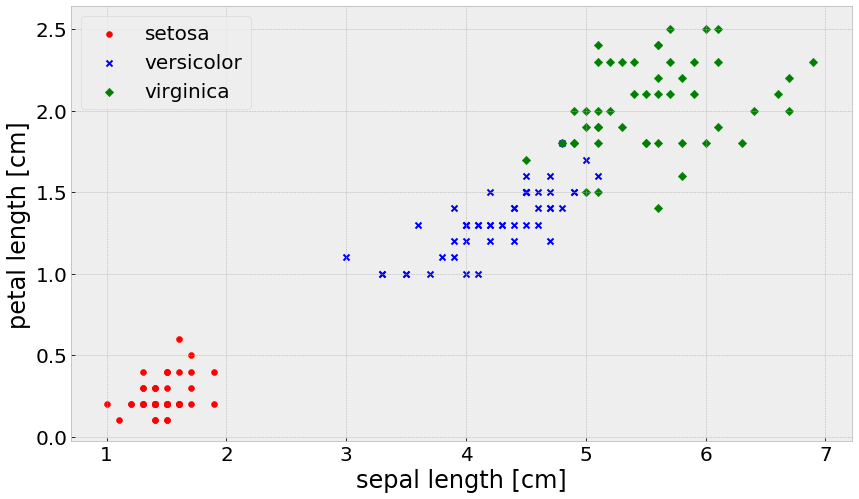

In [6]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Data Pre-processing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Training A Linear Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

In [14]:
tree = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
tree.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Checking The Disission Boundry

In [15]:
from neuralbase import plot_decision_regions_combined

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

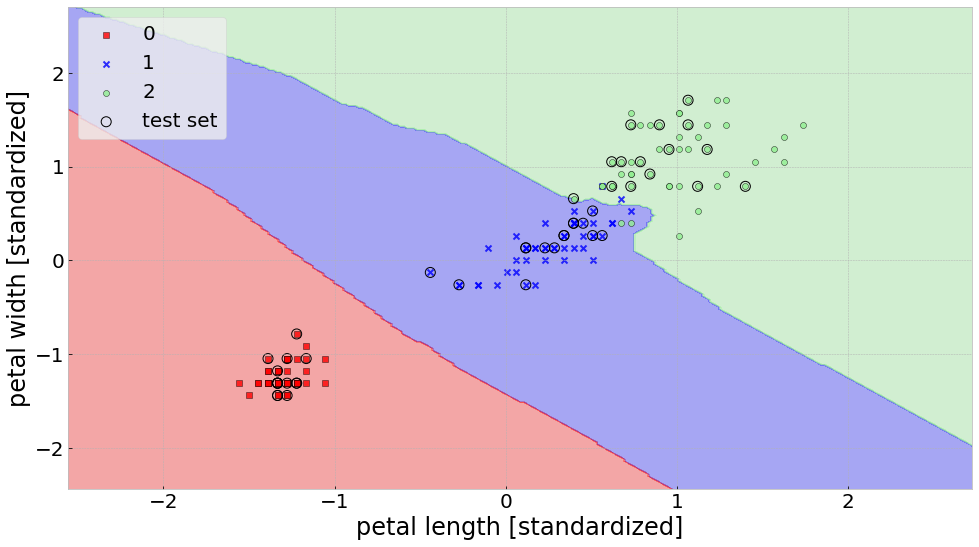

In [18]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined_std, targets=y_combined, 
    classifier=tree, test_idx=range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: KNN application looks simple but as it memorise the whole data so in case of larger data set it will be compution heavy. he right choice of k is crucial to find a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. The minkowski distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance, which can be written as follows:*

\begin{equation*}
    d(x^{i}, x^{j}) = \sqrt{\sum{|x_k^{(i)} -  x_k^{(j)}|^p}}^p
\end{equation*}

*Here $p$ control the base of square root. For $p = 1$ the distance fuction becomes Manhattan distance.*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)